In [1]:
'''
Build a suggorate model for the data
there is a DNN models that want to build
if there are 3 dataset, then there are 3 models after training
Example Code : https://www.youtube.com/watch?v=Jy4wM2X21u0&list=PLhhyoLH6IjfxeoooqP9rhU3HJIAVAJ3Vz&index=3
'''

'\nBuild a suggorate model for the data\nthere is a DNN models that want to build\nif there are 3 dataset, then there are 3 models after training\nExample Code : https://www.youtube.com/watch?v=Jy4wM2X21u0&list=PLhhyoLH6IjfxeoooqP9rhU3HJIAVAJ3Vz&index=3\n'

In [2]:
# load csv file and print the first 5 rows
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from tqdm import tqdm  # For nice progress bar!
from sklearn.model_selection import train_test_split

# Set device cuda for GPU if it's available otherwise run on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

def draw_plot(accuracy_stats, loss_stats):

    # Create dataframes
    train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

    # modify column names
    train_val_acc_df.columns = ['epochs', 'status', 'accuracy']
    train_val_loss_df.columns = ['epochs', 'status', 'loss']
    
    # Plot the dataframes
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    
    # change the limits of y-axis
    axes[0].set_ylim(0.6, 1) 
    axes[1].set_ylim(0, 0.5)
    
    sns.lineplot(data=train_val_acc_df, x = "epochs", y="accuracy", hue="status",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
    sns.lineplot(data=train_val_loss_df, x = "epochs", y="loss", hue="status", ax=axes[1]).set_title('Train-Val Loss/Epoch')


In [4]:
from sklearn.metrics import confusion_matrix

# draw confusion matrix
def draw_confusion_matrix(y_test, y_pred, model, model_name, dataset_resource):
    cm = confusion_matrix(y_test, y_pred)
    total = np.sum(cm)
    confusion_percentage = (cm  / total) * 100

    strings = np.asarray([['%', '%'],
                        ['%', '%']])
    labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 10})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix of {model_name} Surrogate Model', fontsize=15)
    # add accuracy
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    plt.text(0.5, 2.5, f'Dataset from: {dataset_resource}', dict(size=12))
    
    plt.show()

In [5]:
train_lr_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_lr_predicted_0322.csv')
test_lr_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')

train_dt_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_dt_predicted_0322.csv')
test_dt_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')

train_xgb_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_xgb_predicted_0322.csv')
test_xgb_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')

train_dnn_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_dnn_predicted_0322.csv')
test_dnn_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')


# X_train_lr_predicted, y_train_lr_predicted = train_lr_predicted.drop(columns=['LR_Predicted', 'Label'], axis=1), train_lr_predicted['LR_Predicted']
X_train_lr_predicted, X_val_lr_predicted, y_train_lr_predicted, y_val_lr_predicted = train_test_split(train_lr_predicted.drop(columns=['LR_Predicted', 'Label'], axis=1), train_lr_predicted['LR_Predicted'], test_size=0.1, random_state=42)
y_train_lr_predicted.columns = ['Label']
y_val_lr_predicted.columns = ['Label']
# X_val_lr_predicted, y_val_lr_predicted = val_lr_predicted.drop(columns=['LR_Predicted'], axis=1), val_lr_predicted['LR_Predicted']
X_test_lr_predicted, y_test_lr_predicted = test_lr_predicted.drop(columns=['Label'], axis=1), test_lr_predicted['Label']

# X_train_dt_predicted, y_train_dt_predicted = train_dt_predicted.drop(columns=['DT_Predicted', 'Label'], axis=1), train_dt_predicted['DT_Predicted']
X_train_dt_predicted, X_val_dt_predicted, y_train_dt_predicted, y_val_dt_predicted = train_test_split(train_dt_predicted.drop(columns=['DT_Predicted', 'Label'], axis=1), train_dt_predicted['DT_Predicted'], test_size=0.1, random_state=42)
y_train_dt_predicted.columns = ['Label']
y_val_dt_predicted
# X_val_dt_predicted, y_val_dt_predicted = val_dt_predicted.drop(columns=['DT_Predicted'], axis=1), val_dt_predicted['DT_Predicted']
X_test_dt_predicted, y_test_dt_predicted = test_dt_predicted.drop(columns=['Label'], axis=1), test_dt_predicted['Label']

# X_train_xgb_predicted, y_train_xgb_predicted = train_xgb_predicted.drop(columns=['XGB_Predicted', 'Label'], axis=1), train_xgb_predicted['XGB_Predicted']
X_train_xgb_predicted, X_val_xgb_predicted, y_train_xgb_predicted, y_val_xgb_predicted = train_test_split(train_xgb_predicted.drop(columns=['XGB_Predicted', 'Label'], axis=1), train_xgb_predicted['XGB_Predicted'], test_size=0.1, random_state=42)
y_train_xgb_predicted.columns = ['Label']
y_val_xgb_predicted.columns = ['Label']
# X_val_xgb_predicted, y_val_xgb_predicted = val_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), val_xgb_predicted['XGB_Predicted']    
X_test_xgb_predicted, y_test_xgb_predicted = test_xgb_predicted.drop(columns=['Label'], axis=1), test_xgb_predicted['Label']

# X_train_dnn_predicted, y_train_dnn_predicted = train_dnn_predicted.drop(columns=['DNN_Predicted', 'Label'], axis=1), train_dnn_predicted['DNN_Predicted']
X_train_dnn_predicted, X_val_dnn_predicted, y_train_dnn_predicted, y_val_dnn_predicted = train_test_split(train_dnn_predicted.drop(columns=['DNN_Predicted', 'Label'], axis=1), train_dnn_predicted['DNN_Predicted'], test_size=0.1, random_state=42)
y_train_dnn_predicted.columns = ['Label']
y_val_dnn_predicted.columns = ['Label']
# X_val_dnn_predicted, y_val_dnn_predicted = val_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), val_dnn_predicted['DNN_Predicted']
X_test_dnn_predicted, y_test_dnn_predicted = test_dnn_predicted.drop(columns=['Label'], axis=1), test_dnn_predicted['Label']

In [6]:
# Hyperparameters
input_size = len(X_train_xgb_predicted.columns) # 42
num_classes = 2
learning_rate = 0.0001
batch_size = 64
num_epochs = 50

In [7]:
## create dataloaders by myself
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)



In [8]:
# Here we create our simple neural network. For more details here we are subclassing and
# inheriting from nn.Module, this is the most general way to create your networks and
# allows for more flexibility. I encourage you to also check out nn.Sequential which
# would be easier to use in this scenario but I wanted to show you something that
# "always" works and is a general approach.
class DNN(nn.Module):
    def __init__(self, input_size, num_classes):
        """
        Here we define the layers of the network. We create two fully connected layers

        Parameters:
            input_size: the size of the input, in this case 784 (28x28)
            num_classes: the number of classes we want to predict, in this case 10 (0-9)

        """
        super(DNN, self).__init__()
        # Our first linear layer take input_size, in this case 784 nodes to 50
        # and our second linear layer takes 50 to the num_classes we have, in
        # this case 10.
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, num_classes)
        # self.fc3 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(p=0.5)
        
        self.relu = nn.ReLU()
        self.act3 = nn.Softmax()
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(num_classes)

    def forward(self, x):
        """
        x here is the mnist images and we run it through fc1, fc2 that we created above.
        we also add a ReLU activation function in between and for that (since it has no parameters)
        I recommend using nn.functional (F)

        Parameters:
            x: mnist images

        Returns:
            out: the output of the network
        """

        #x = F.relu(self.fc1(x))
        x = self.fc1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.batchnorm2(x)
        return x

In [9]:
# train model for one epoch

def train_for_one_epoch(model, train_loader, val_loader, criterion, optimizer, num_epochs):

     # train model
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Get to correct shape
        #data = data.reshape(data.shape[0], -1)

        # Forward
        y_train_pred = model(data)
        
        # train_loss, train_acc per batch
        train_loss = criterion(y_train_pred, targets) 
        train_acc  = (y_train_pred.argmax(1) == targets).float().sum() / len(targets)
        
        # Backward
        optimizer.zero_grad()
        train_loss.backward()

        # Gradient descent or adam step
        optimizer.step()

        train_epoch_loss += train_loss.item()   
        train_epoch_acc += train_acc.item()
    return train_epoch_loss, train_epoch_acc

In [10]:
# test the model

def test_model(loader, model):
    y_pred_list = []
    with torch.no_grad():
        model.eval()
        for X_batch, _ in loader:
            X_batch = X_batch.to(device)
            y_test_pred = model(X_batch)
            _, y_pred_tags = torch.max(y_test_pred, dim = 1)
            #print(_, y_pred_tags.cpu().numpy())
            y_pred_list.append(y_pred_tags.cpu().numpy())
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    return y_pred_list

In [11]:
# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    # We don't need to keep track of gradients here so we wrap it in torch.no_grad()
    with torch.no_grad():
        # Loop through the data
        for x, y in loader:

            # Move data to device
            x = x.to(device=device)
            y = y.to(device=device)

            # Forward pass
            scores = model(x)
            _, predictions = scores.max(1)

            # Check how many we got correct
            num_correct += (predictions == y).sum()

            # Keep track of number of samples
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples

### Train for Logistic Regression Predicted Data

In [12]:

train_dataset = ClassifierDataset(torch.tensor(np.array(X_train_lr_predicted)).float(), torch.tensor(np.array(y_train_lr_predicted)).long())
val_dataset = ClassifierDataset(torch.tensor(np.array(X_val_lr_predicted)).float(), torch.tensor(np.array(y_val_lr_predicted)).long())
test_dataset = ClassifierDataset(torch.tensor(np.array(X_test_lr_predicted)).float(), torch.tensor(np.array(y_test_lr_predicted)).long())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1,drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1,drop_last=True)

In [13]:
# Imports
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
from datetime import datetime


# Initialize network
model = DNN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# accuracy, loss status for each epoch
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}


print("Begin training.")
best_vloss = 1000000
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# Train Network
for epoch in range(num_epochs):
    
    # train model
    train_epoch_loss, train_epoch_acc = train_for_one_epoch(model, train_loader, val_loader, criterion, optimizer, num_epochs)
        
    # validate model
    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            val_loss = criterion(voutputs, vlabels)
            val_acc = (voutputs.argmax(1) == vlabels).float().sum() / len(vlabels)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    avg_vloss = val_epoch_loss/len(val_loader)


    # save the accuracy and loss for each epoch   
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
    
    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = '../surrogate_model/surrogate_DNN_model/surrogateDNN_model_fromLR_{}_{}'.format(timestamp, epoch) # target_model\target_DNN_model\binaryclass
        torch.save(model.state_dict(), model_path)                           
        torch.save(model, model_path + '.pth')    
        
    print(f'Epoch {epoch + 1}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.4f}| Val Acc: {val_epoch_acc/len(val_loader):.4f}')

        

# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    """
    Check accuracy of our trained model given a loader and a model

    Parameters:
        loader: torch.utils.data.DataLoader
            A loader for the dataset you want to check accuracy on
        model: nn.Module
            The model you want to check accuracy on

    Returns:
        acc: float
            The accuracy of the model on the dataset given by the loader
    """

    num_correct = 0
    num_samples = 0
    model.eval()

    # We don't need to keep track of gradients here so we wrap it in torch.no_grad()
    with torch.no_grad():
        # Loop through the data
        for x, y in loader:

            # Move data to device
            x = x.to(device=device)
            y = y.to(device=device)

            # Get to correct shape
           # x = x.reshape(x.shape[0], -1)

            # Forward pass
            scores = model(x)
            _, predictions = scores.max(1)

            # Check how many we got correct
            num_correct += (predictions == y).sum()

            # Keep track of number of samples
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples


# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")


Begin training.


  0%|          | 0/566 [00:00<?, ?it/s]

100%|██████████| 566/566 [00:01<00:00, 524.44it/s]


Epoch 1: | Train Loss: 0.52767 | Val Loss: 0.50342 | Train Acc: 0.7946| Val Acc: 0.8566


100%|██████████| 566/566 [00:01<00:00, 523.60it/s]


Epoch 2: | Train Loss: 0.43720 | Val Loss: 0.47027 | Train Acc: 0.8531| Val Acc: 0.8712


100%|██████████| 566/566 [00:01<00:00, 514.12it/s]


Epoch 3: | Train Loss: 0.40041 | Val Loss: 0.44126 | Train Acc: 0.8687| Val Acc: 0.8868


100%|██████████| 566/566 [00:01<00:00, 527.91it/s]


Epoch 4: | Train Loss: 0.37547 | Val Loss: 0.41988 | Train Acc: 0.8781| Val Acc: 0.8943


100%|██████████| 566/566 [00:01<00:00, 538.61it/s]


Epoch 5: | Train Loss: 0.35629 | Val Loss: 0.39729 | Train Acc: 0.8846| Val Acc: 0.8978


100%|██████████| 566/566 [00:01<00:00, 538.39it/s]


Epoch 6: | Train Loss: 0.34136 | Val Loss: 0.38684 | Train Acc: 0.8883| Val Acc: 0.9010


100%|██████████| 566/566 [00:01<00:00, 388.10it/s]


Epoch 7: | Train Loss: 0.32666 | Val Loss: 0.36835 | Train Acc: 0.8956| Val Acc: 0.9248


100%|██████████| 566/566 [00:01<00:00, 538.41it/s]


Epoch 8: | Train Loss: 0.31623 | Val Loss: 0.35548 | Train Acc: 0.8969| Val Acc: 0.9275


100%|██████████| 566/566 [00:01<00:00, 527.53it/s]


Epoch 9: | Train Loss: 0.30492 | Val Loss: 0.34715 | Train Acc: 0.9011| Val Acc: 0.9310


100%|██████████| 566/566 [00:01<00:00, 505.70it/s]


Epoch 10: | Train Loss: 0.29772 | Val Loss: 0.33715 | Train Acc: 0.9028| Val Acc: 0.9328


100%|██████████| 566/566 [00:01<00:00, 548.03it/s]


Epoch 11: | Train Loss: 0.28980 | Val Loss: 0.32714 | Train Acc: 0.9053| Val Acc: 0.8970


100%|██████████| 566/566 [00:01<00:00, 515.36it/s]


Epoch 12: | Train Loss: 0.28316 | Val Loss: 0.31965 | Train Acc: 0.9078| Val Acc: 0.9238


100%|██████████| 566/566 [00:01<00:00, 540.47it/s]


Epoch 13: | Train Loss: 0.27567 | Val Loss: 0.31153 | Train Acc: 0.9101| Val Acc: 0.8983


100%|██████████| 566/566 [00:01<00:00, 547.05it/s]


Epoch 14: | Train Loss: 0.26787 | Val Loss: 0.30104 | Train Acc: 0.9116| Val Acc: 0.8993


100%|██████████| 566/566 [00:01<00:00, 539.18it/s]


Epoch 15: | Train Loss: 0.26600 | Val Loss: 0.29278 | Train Acc: 0.9138| Val Acc: 0.8985


100%|██████████| 566/566 [00:01<00:00, 540.53it/s]


Epoch 16: | Train Loss: 0.26030 | Val Loss: 0.28788 | Train Acc: 0.9138| Val Acc: 0.9179


100%|██████████| 566/566 [00:01<00:00, 535.34it/s]


Epoch 17: | Train Loss: 0.25756 | Val Loss: 0.28952 | Train Acc: 0.9147| Val Acc: 0.8993


100%|██████████| 566/566 [00:01<00:00, 527.86it/s]


Epoch 18: | Train Loss: 0.25237 | Val Loss: 0.27643 | Train Acc: 0.9164| Val Acc: 0.9069


100%|██████████| 566/566 [00:01<00:00, 550.46it/s]


Epoch 19: | Train Loss: 0.25063 | Val Loss: 0.27572 | Train Acc: 0.9154| Val Acc: 0.9136


100%|██████████| 566/566 [00:01<00:00, 539.58it/s]


Epoch 20: | Train Loss: 0.24832 | Val Loss: 0.27871 | Train Acc: 0.9189| Val Acc: 0.8985


100%|██████████| 566/566 [00:01<00:00, 539.56it/s]


Epoch 21: | Train Loss: 0.24546 | Val Loss: 0.27453 | Train Acc: 0.9187| Val Acc: 0.9141


100%|██████████| 566/566 [00:01<00:00, 559.16it/s]


Epoch 22: | Train Loss: 0.24240 | Val Loss: 0.26581 | Train Acc: 0.9184| Val Acc: 0.9171


100%|██████████| 566/566 [00:01<00:00, 518.67it/s]


Epoch 23: | Train Loss: 0.23954 | Val Loss: 0.26589 | Train Acc: 0.9212| Val Acc: 0.9104


100%|██████████| 566/566 [00:01<00:00, 561.92it/s]


Epoch 24: | Train Loss: 0.23733 | Val Loss: 0.26881 | Train Acc: 0.9210| Val Acc: 0.8978


100%|██████████| 566/566 [00:01<00:00, 482.62it/s]


Epoch 25: | Train Loss: 0.23259 | Val Loss: 0.26186 | Train Acc: 0.9222| Val Acc: 0.9012


100%|██████████| 566/566 [00:01<00:00, 554.38it/s]


Epoch 26: | Train Loss: 0.23291 | Val Loss: 0.27277 | Train Acc: 0.9208| Val Acc: 0.8948


100%|██████████| 566/566 [00:01<00:00, 543.66it/s]


Epoch 27: | Train Loss: 0.22910 | Val Loss: 0.26049 | Train Acc: 0.9219| Val Acc: 0.8968


100%|██████████| 566/566 [00:01<00:00, 553.59it/s]


Epoch 28: | Train Loss: 0.22787 | Val Loss: 0.27009 | Train Acc: 0.9226| Val Acc: 0.8948


100%|██████████| 566/566 [00:01<00:00, 445.90it/s]


Epoch 29: | Train Loss: 0.22660 | Val Loss: 0.26530 | Train Acc: 0.9237| Val Acc: 0.8953


100%|██████████| 566/566 [00:01<00:00, 538.73it/s]


Epoch 30: | Train Loss: 0.22566 | Val Loss: 0.26309 | Train Acc: 0.9229| Val Acc: 0.8968


100%|██████████| 566/566 [00:01<00:00, 550.33it/s]


Epoch 31: | Train Loss: 0.22355 | Val Loss: 0.25785 | Train Acc: 0.9240| Val Acc: 0.8990


100%|██████████| 566/566 [00:01<00:00, 535.86it/s]


Epoch 32: | Train Loss: 0.22273 | Val Loss: 0.25985 | Train Acc: 0.9245| Val Acc: 0.8953


100%|██████████| 566/566 [00:01<00:00, 528.84it/s]


Epoch 33: | Train Loss: 0.21891 | Val Loss: 0.25796 | Train Acc: 0.9247| Val Acc: 0.8955


100%|██████████| 566/566 [00:01<00:00, 539.96it/s]


Epoch 34: | Train Loss: 0.21733 | Val Loss: 0.24734 | Train Acc: 0.9250| Val Acc: 0.9035


100%|██████████| 566/566 [00:01<00:00, 560.26it/s]


Epoch 35: | Train Loss: 0.21584 | Val Loss: 0.25154 | Train Acc: 0.9262| Val Acc: 0.8980


100%|██████████| 566/566 [00:01<00:00, 524.34it/s]


Epoch 36: | Train Loss: 0.21537 | Val Loss: 0.23769 | Train Acc: 0.9250| Val Acc: 0.9203


100%|██████████| 566/566 [00:01<00:00, 535.24it/s]


Epoch 37: | Train Loss: 0.21490 | Val Loss: 0.24441 | Train Acc: 0.9260| Val Acc: 0.9164


100%|██████████| 566/566 [00:01<00:00, 466.12it/s]


Epoch 38: | Train Loss: 0.21322 | Val Loss: 0.23879 | Train Acc: 0.9271| Val Acc: 0.9112


100%|██████████| 566/566 [00:01<00:00, 408.87it/s]


Epoch 39: | Train Loss: 0.20878 | Val Loss: 0.24445 | Train Acc: 0.9286| Val Acc: 0.8993


100%|██████████| 566/566 [00:01<00:00, 531.81it/s]


Epoch 40: | Train Loss: 0.20834 | Val Loss: 0.24262 | Train Acc: 0.9281| Val Acc: 0.8998


100%|██████████| 566/566 [00:01<00:00, 534.34it/s]


Epoch 41: | Train Loss: 0.20416 | Val Loss: 0.23927 | Train Acc: 0.9302| Val Acc: 0.9065


100%|██████████| 566/566 [00:01<00:00, 514.55it/s]


Epoch 42: | Train Loss: 0.20476 | Val Loss: 0.24395 | Train Acc: 0.9299| Val Acc: 0.8970


100%|██████████| 566/566 [00:01<00:00, 532.63it/s]


Epoch 43: | Train Loss: 0.20350 | Val Loss: 0.24389 | Train Acc: 0.9292| Val Acc: 0.8975


100%|██████████| 566/566 [00:01<00:00, 543.06it/s]


Epoch 44: | Train Loss: 0.20334 | Val Loss: 0.24337 | Train Acc: 0.9294| Val Acc: 0.8980


100%|██████████| 566/566 [00:01<00:00, 547.00it/s]


Epoch 45: | Train Loss: 0.20094 | Val Loss: 0.25178 | Train Acc: 0.9295| Val Acc: 0.8945


100%|██████████| 566/566 [00:01<00:00, 528.62it/s]


Epoch 46: | Train Loss: 0.19817 | Val Loss: 0.23440 | Train Acc: 0.9309| Val Acc: 0.9119


100%|██████████| 566/566 [00:01<00:00, 547.78it/s]


Epoch 47: | Train Loss: 0.19660 | Val Loss: 0.24764 | Train Acc: 0.9320| Val Acc: 0.8960


100%|██████████| 566/566 [00:01<00:00, 550.71it/s]


Epoch 48: | Train Loss: 0.19604 | Val Loss: 0.22993 | Train Acc: 0.9308| Val Acc: 0.9119


100%|██████████| 566/566 [00:01<00:00, 509.56it/s]


Epoch 49: | Train Loss: 0.19638 | Val Loss: 0.24388 | Train Acc: 0.9318| Val Acc: 0.8968


100%|██████████| 566/566 [00:01<00:00, 526.88it/s]


Epoch 50: | Train Loss: 0.19890 | Val Loss: 0.24633 | Train Acc: 0.9313| Val Acc: 0.8990
Accuracy on training set: 89.30
Accuracy on test set: 84.70


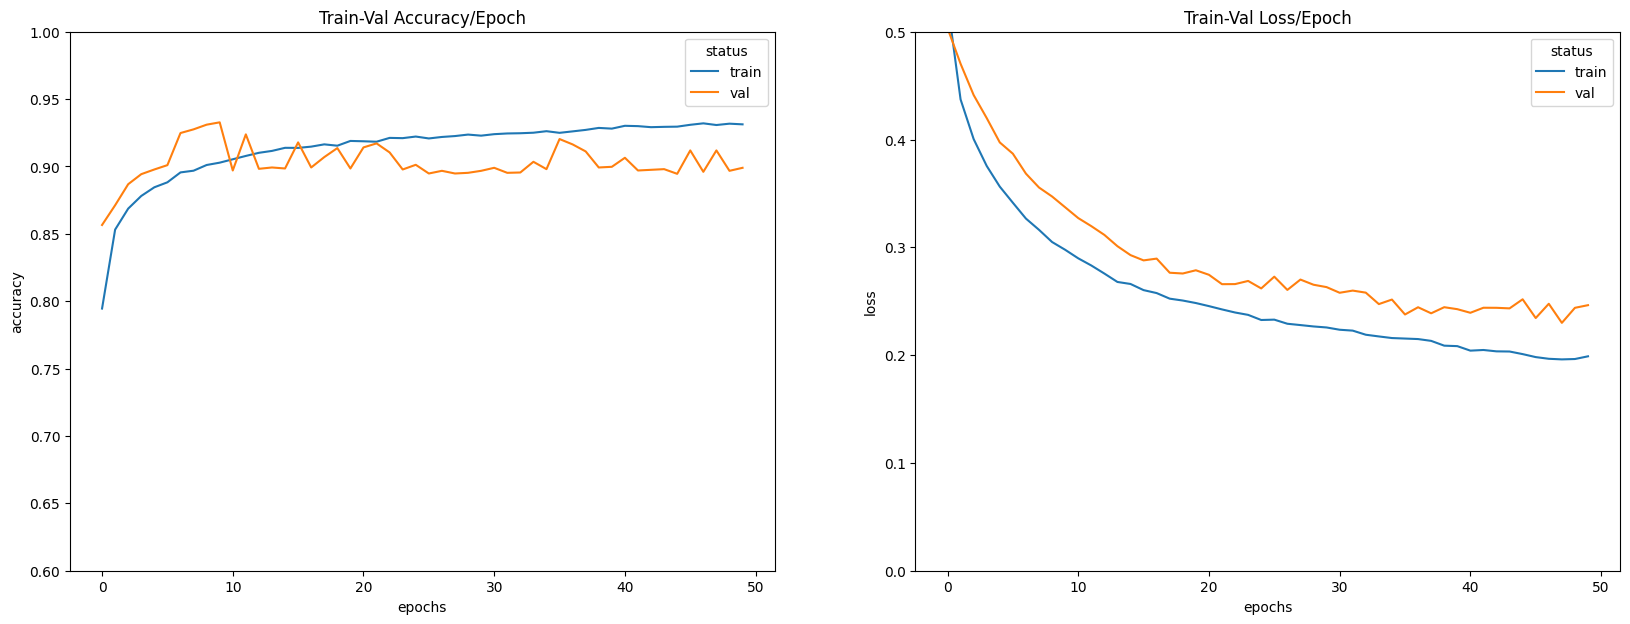

In [14]:
# Draw the plot
draw_plot(accuracy_stats, loss_stats)

# Test the model
y_pred_list = test_model(test_loader, model)

In [15]:
# test accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("accuracy of test data: ", accuracy_score(y_test_lr_predicted, y_pred_list))
print(classification_report(y_test_lr_predicted, y_pred_list, target_names=['Benign', 'Malicious'], digits=4))

accuracy of test data:  0.8469777674849467
              precision    recall  f1-score   support

      Benign     0.8390    0.9772    0.9029     12571
   Malicious     0.8913    0.4986    0.6395      4701

    accuracy                         0.8470     17272
   macro avg     0.8651    0.7379    0.7712     17272
weighted avg     0.8532    0.8470    0.8312     17272



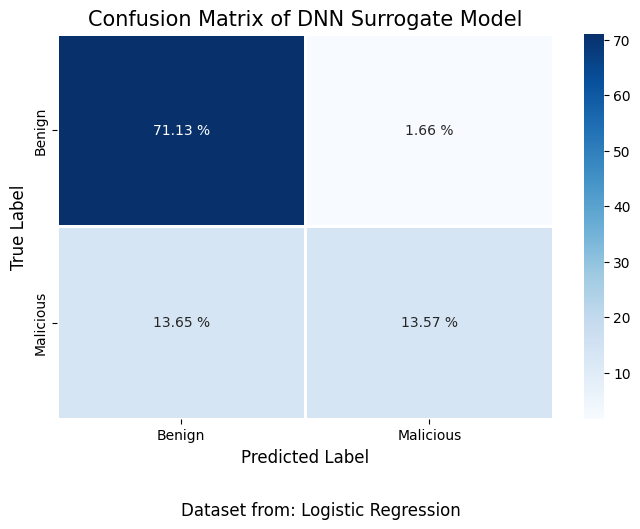

In [16]:
# draw confusion matrix
draw_confusion_matrix(y_test_lr_predicted, y_pred_list, model, 'DNN', 'Logistic Regression')

### Train for Decision Tree Predicted Data

In [17]:
train_dataset = ClassifierDataset(torch.tensor(np.array(X_train_dt_predicted)).float(), torch.tensor(np.array(y_train_dt_predicted)).long())
val_dataset = ClassifierDataset(torch.tensor(np.array(X_val_dt_predicted)).float(), torch.tensor(np.array(y_val_dt_predicted)).long())
test_dataset = ClassifierDataset(torch.tensor(np.array(X_test_dt_predicted)).float(), torch.tensor(np.array(y_test_dt_predicted)).long())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1,drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1,drop_last=True)

In [18]:
# Imports
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
from datetime import datetime


# Initialize network
model = DNN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# accuracy, loss status for each epoch
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

print("Begin training.")
best_vloss = 1000000
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# Train Network
for epoch in range(num_epochs):
    # train model
    train_epoch_loss, train_epoch_acc = train_for_one_epoch(model, train_loader, val_loader, criterion, optimizer, num_epochs)

    # validate model
    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc = 0
        model.eval()
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            val_loss = criterion(voutputs, vlabels)
            val_acc = (voutputs.argmax(1) == vlabels).float().sum() / len(vlabels)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    avg_vloss = val_epoch_loss/len(val_loader)


    # save the accuracy and loss for each epoch   
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
    
    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = '../surrogate_model/surrogate_DNN_model/surrogateDNN_model_fromDT_{}_{}'.format(timestamp, epoch) # target_model\target_DNN_model\binaryclass
        torch.save(model.state_dict(), model_path)                           
        torch.save(model, model_path + '.pth')    
        
    print(f'Epoch {epoch + 1}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.4f}| Val Acc: {val_epoch_acc/len(val_loader):.4f}')


# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

Begin training.


  0%|          | 0/566 [00:00<?, ?it/s]

100%|██████████| 566/566 [00:01<00:00, 540.14it/s]


Epoch 1: | Train Loss: 0.57236 | Val Loss: 0.49886 | Train Acc: 0.8317| Val Acc: 0.8799


100%|██████████| 566/566 [00:01<00:00, 532.58it/s]


Epoch 2: | Train Loss: 0.47674 | Val Loss: 0.46172 | Train Acc: 0.8752| Val Acc: 0.8940


100%|██████████| 566/566 [00:01<00:00, 536.38it/s]


Epoch 3: | Train Loss: 0.43085 | Val Loss: 0.42233 | Train Acc: 0.8866| Val Acc: 0.9042


100%|██████████| 566/566 [00:01<00:00, 436.27it/s]


Epoch 4: | Train Loss: 0.39947 | Val Loss: 0.39919 | Train Acc: 0.8936| Val Acc: 0.9087


100%|██████████| 566/566 [00:01<00:00, 474.69it/s]


Epoch 5: | Train Loss: 0.37310 | Val Loss: 0.38187 | Train Acc: 0.8997| Val Acc: 0.9112


100%|██████████| 566/566 [00:01<00:00, 530.34it/s]


Epoch 6: | Train Loss: 0.35236 | Val Loss: 0.36162 | Train Acc: 0.9036| Val Acc: 0.9132


100%|██████████| 566/566 [00:01<00:00, 540.39it/s]


Epoch 7: | Train Loss: 0.33387 | Val Loss: 0.34898 | Train Acc: 0.9043| Val Acc: 0.9149


100%|██████████| 566/566 [00:01<00:00, 543.58it/s]


Epoch 8: | Train Loss: 0.31667 | Val Loss: 0.33594 | Train Acc: 0.9071| Val Acc: 0.9149


100%|██████████| 566/566 [00:01<00:00, 549.93it/s]


Epoch 9: | Train Loss: 0.30436 | Val Loss: 0.32253 | Train Acc: 0.9083| Val Acc: 0.9146


100%|██████████| 566/566 [00:01<00:00, 473.33it/s]


Epoch 10: | Train Loss: 0.29437 | Val Loss: 0.31606 | Train Acc: 0.9086| Val Acc: 0.9139


100%|██████████| 566/566 [00:01<00:00, 548.34it/s]


Epoch 11: | Train Loss: 0.28179 | Val Loss: 0.30346 | Train Acc: 0.9107| Val Acc: 0.9146


100%|██████████| 566/566 [00:01<00:00, 552.07it/s]


Epoch 12: | Train Loss: 0.27194 | Val Loss: 0.30312 | Train Acc: 0.9113| Val Acc: 0.9181


100%|██████████| 566/566 [00:01<00:00, 549.36it/s]


Epoch 13: | Train Loss: 0.26465 | Val Loss: 0.29015 | Train Acc: 0.9131| Val Acc: 0.9196


100%|██████████| 566/566 [00:01<00:00, 547.10it/s]


Epoch 14: | Train Loss: 0.25776 | Val Loss: 0.29122 | Train Acc: 0.9140| Val Acc: 0.9194


100%|██████████| 566/566 [00:01<00:00, 469.85it/s]


Epoch 15: | Train Loss: 0.25126 | Val Loss: 0.28100 | Train Acc: 0.9151| Val Acc: 0.9189


100%|██████████| 566/566 [00:01<00:00, 535.36it/s]


Epoch 16: | Train Loss: 0.24397 | Val Loss: 0.27218 | Train Acc: 0.9165| Val Acc: 0.9191


100%|██████████| 566/566 [00:01<00:00, 557.51it/s]


Epoch 17: | Train Loss: 0.24019 | Val Loss: 0.27226 | Train Acc: 0.9167| Val Acc: 0.9196


100%|██████████| 566/566 [00:01<00:00, 535.88it/s]


Epoch 18: | Train Loss: 0.23233 | Val Loss: 0.26865 | Train Acc: 0.9183| Val Acc: 0.9203


100%|██████████| 566/566 [00:01<00:00, 537.81it/s]


Epoch 19: | Train Loss: 0.23001 | Val Loss: 0.25838 | Train Acc: 0.9200| Val Acc: 0.9199


100%|██████████| 566/566 [00:01<00:00, 552.07it/s]


Epoch 20: | Train Loss: 0.22402 | Val Loss: 0.26070 | Train Acc: 0.9212| Val Acc: 0.9203


100%|██████████| 566/566 [00:01<00:00, 560.27it/s]


Epoch 21: | Train Loss: 0.22139 | Val Loss: 0.25801 | Train Acc: 0.9221| Val Acc: 0.9218


100%|██████████| 566/566 [00:01<00:00, 533.34it/s]


Epoch 22: | Train Loss: 0.21841 | Val Loss: 0.25475 | Train Acc: 0.9228| Val Acc: 0.9201


100%|██████████| 566/566 [00:01<00:00, 491.83it/s]


Epoch 23: | Train Loss: 0.21382 | Val Loss: 0.25298 | Train Acc: 0.9240| Val Acc: 0.9223


100%|██████████| 566/566 [00:01<00:00, 530.00it/s]


Epoch 24: | Train Loss: 0.20905 | Val Loss: 0.24532 | Train Acc: 0.9264| Val Acc: 0.9218


100%|██████████| 566/566 [00:01<00:00, 514.89it/s]


Epoch 25: | Train Loss: 0.20699 | Val Loss: 0.24055 | Train Acc: 0.9271| Val Acc: 0.9208


100%|██████████| 566/566 [00:01<00:00, 506.75it/s]


Epoch 26: | Train Loss: 0.20313 | Val Loss: 0.24399 | Train Acc: 0.9275| Val Acc: 0.9208


100%|██████████| 566/566 [00:01<00:00, 454.91it/s]


Epoch 27: | Train Loss: 0.20038 | Val Loss: 0.23138 | Train Acc: 0.9290| Val Acc: 0.9228


100%|██████████| 566/566 [00:01<00:00, 544.99it/s]


Epoch 28: | Train Loss: 0.19643 | Val Loss: 0.24117 | Train Acc: 0.9295| Val Acc: 0.9236


100%|██████████| 566/566 [00:01<00:00, 535.66it/s]


Epoch 29: | Train Loss: 0.19445 | Val Loss: 0.22780 | Train Acc: 0.9299| Val Acc: 0.9226


100%|██████████| 566/566 [00:01<00:00, 547.60it/s]


Epoch 30: | Train Loss: 0.19054 | Val Loss: 0.22968 | Train Acc: 0.9321| Val Acc: 0.9228


100%|██████████| 566/566 [00:01<00:00, 561.94it/s]


Epoch 31: | Train Loss: 0.18781 | Val Loss: 0.22513 | Train Acc: 0.9322| Val Acc: 0.9233


100%|██████████| 566/566 [00:01<00:00, 533.75it/s]


Epoch 32: | Train Loss: 0.18560 | Val Loss: 0.22089 | Train Acc: 0.9327| Val Acc: 0.9218


100%|██████████| 566/566 [00:01<00:00, 521.20it/s]


Epoch 33: | Train Loss: 0.18564 | Val Loss: 0.23216 | Train Acc: 0.9331| Val Acc: 0.9040


100%|██████████| 566/566 [00:01<00:00, 548.42it/s]


Epoch 34: | Train Loss: 0.18477 | Val Loss: 0.21399 | Train Acc: 0.9327| Val Acc: 0.9489


100%|██████████| 566/566 [00:01<00:00, 544.56it/s]


Epoch 35: | Train Loss: 0.18206 | Val Loss: 0.21783 | Train Acc: 0.9350| Val Acc: 0.9223


100%|██████████| 566/566 [00:01<00:00, 521.53it/s]


Epoch 36: | Train Loss: 0.18016 | Val Loss: 0.21384 | Train Acc: 0.9350| Val Acc: 0.9228


100%|██████████| 566/566 [00:01<00:00, 540.08it/s]


Epoch 37: | Train Loss: 0.17750 | Val Loss: 0.21510 | Train Acc: 0.9370| Val Acc: 0.9228


100%|██████████| 566/566 [00:01<00:00, 473.73it/s]


Epoch 38: | Train Loss: 0.17697 | Val Loss: 0.20565 | Train Acc: 0.9363| Val Acc: 0.9308


100%|██████████| 566/566 [00:01<00:00, 549.08it/s]


Epoch 39: | Train Loss: 0.17502 | Val Loss: 0.20907 | Train Acc: 0.9381| Val Acc: 0.9243


100%|██████████| 566/566 [00:01<00:00, 554.22it/s]


Epoch 40: | Train Loss: 0.17364 | Val Loss: 0.19673 | Train Acc: 0.9380| Val Acc: 0.9211


100%|██████████| 566/566 [00:01<00:00, 538.88it/s]


Epoch 41: | Train Loss: 0.17140 | Val Loss: 0.20154 | Train Acc: 0.9382| Val Acc: 0.9223


100%|██████████| 566/566 [00:01<00:00, 559.18it/s]


Epoch 42: | Train Loss: 0.17245 | Val Loss: 0.19028 | Train Acc: 0.9389| Val Acc: 0.9213


100%|██████████| 566/566 [00:01<00:00, 538.85it/s]


Epoch 43: | Train Loss: 0.16843 | Val Loss: 0.20584 | Train Acc: 0.9403| Val Acc: 0.9226


100%|██████████| 566/566 [00:01<00:00, 551.53it/s]


Epoch 44: | Train Loss: 0.16643 | Val Loss: 0.19564 | Train Acc: 0.9396| Val Acc: 0.9226


100%|██████████| 566/566 [00:01<00:00, 552.60it/s]


Epoch 45: | Train Loss: 0.16585 | Val Loss: 0.19040 | Train Acc: 0.9400| Val Acc: 0.9092


100%|██████████| 566/566 [00:01<00:00, 553.11it/s]


Epoch 46: | Train Loss: 0.16513 | Val Loss: 0.19304 | Train Acc: 0.9403| Val Acc: 0.9541


100%|██████████| 566/566 [00:01<00:00, 440.41it/s]


Epoch 47: | Train Loss: 0.16431 | Val Loss: 0.19801 | Train Acc: 0.9427| Val Acc: 0.9533


100%|██████████| 566/566 [00:01<00:00, 541.26it/s]


Epoch 48: | Train Loss: 0.16198 | Val Loss: 0.19974 | Train Acc: 0.9430| Val Acc: 0.9052


100%|██████████| 566/566 [00:01<00:00, 548.30it/s]


Epoch 49: | Train Loss: 0.16179 | Val Loss: 0.20045 | Train Acc: 0.9440| Val Acc: 0.9050


100%|██████████| 566/566 [00:01<00:00, 542.57it/s]


Epoch 50: | Train Loss: 0.15822 | Val Loss: 0.18023 | Train Acc: 0.9444| Val Acc: 0.9667
Accuracy on training set: 96.34
Accuracy on test set: 86.87


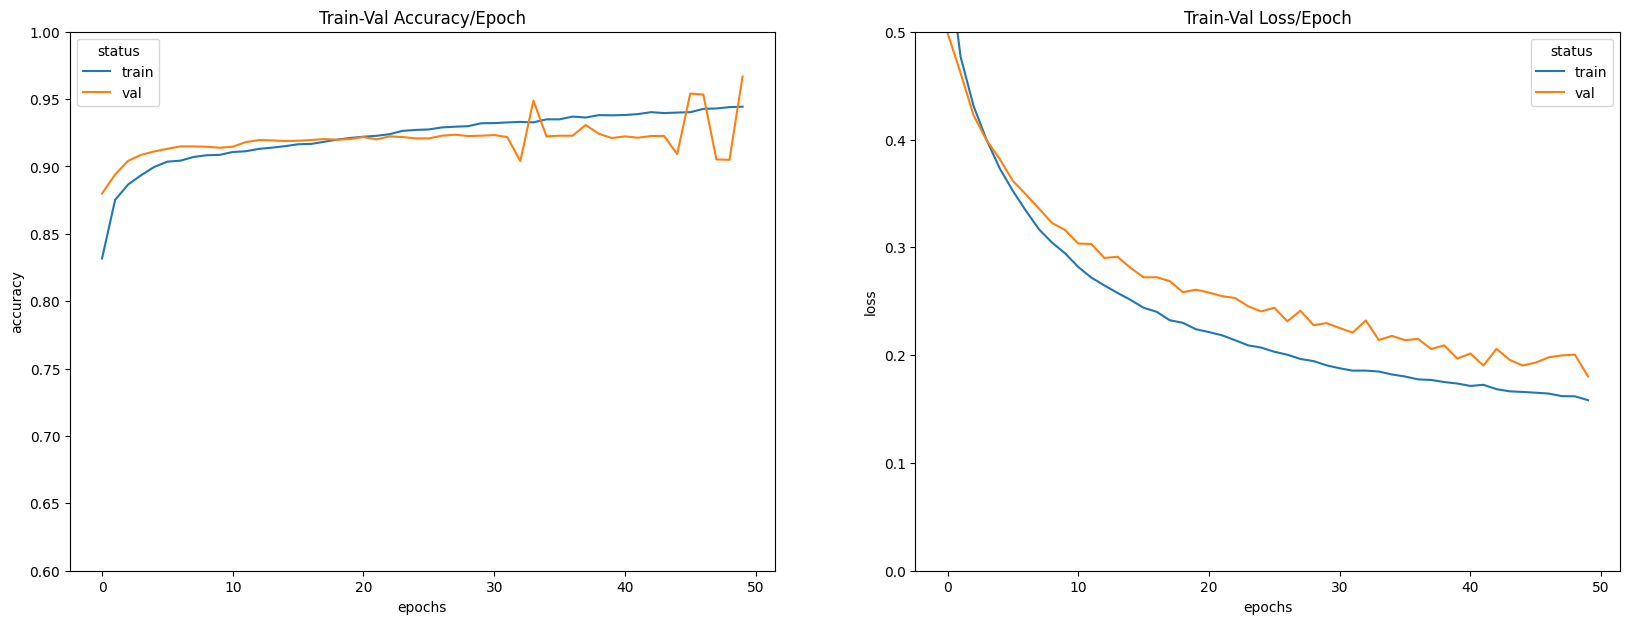

In [19]:
# Draw the plot
draw_plot(accuracy_stats, loss_stats)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Test the model
y_pred_list = test_model(test_loader, model)

# test accuracy
print("accuracy of test data: ", accuracy_score(y_test_dt_predicted, y_pred_list))
print(classification_report(y_test_dt_predicted, y_pred_list, target_names=['Benign', 'Malicious'], digits=4))

accuracy of test data:  0.8686892079666513
              precision    recall  f1-score   support

      Benign     0.8523    0.9914    0.9166     12571
   Malicious     0.9592    0.5405    0.6914      4701

    accuracy                         0.8687     17272
   macro avg     0.9058    0.7660    0.8040     17272
weighted avg     0.8814    0.8687    0.8553     17272



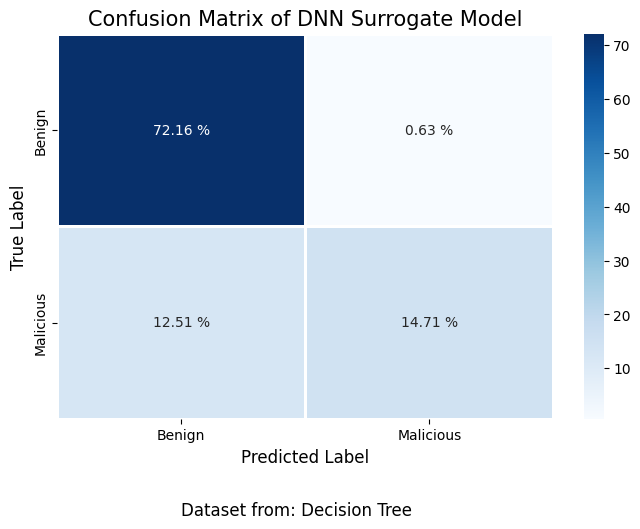

In [21]:
# draw confusion matrix
draw_confusion_matrix(y_test_dt_predicted, y_pred_list, model, 'DNN', 'Decision Tree')

### Train for Xgboost Predicted Data

In [22]:
train_dataset = ClassifierDataset(torch.tensor(np.array(X_train_xgb_predicted)).float(), torch.tensor(np.array(y_train_xgb_predicted)).long())
val_dataset = ClassifierDataset(torch.tensor(np.array(X_val_xgb_predicted)).float(), torch.tensor(np.array(y_val_xgb_predicted)).long())
test_dataset = ClassifierDataset(torch.tensor(np.array(X_test_xgb_predicted)).float(), torch.tensor(np.array(y_test_xgb_predicted)).long())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1,drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1,drop_last=True)

In [23]:
# Imports
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
from datetime import datetime


# Initialize network
model = DNN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# accuracy, loss status for each epoch
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

print("Begin training.")
best_vloss = 1000000
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# Train Network
for epoch in range(num_epochs):
    # train model
    train_epoch_loss, train_epoch_acc = train_for_one_epoch(model, train_loader, val_loader, criterion, optimizer, num_epochs)

    # validate model
    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc = 0
        model.eval()
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            val_loss = criterion(voutputs, vlabels)
            val_acc = (voutputs.argmax(1) == vlabels).float().sum() / len(vlabels)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    avg_vloss = val_epoch_loss/len(val_loader)


    # save the accuracy and loss for each epoch   
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
    
    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = '../surrogate_model/surrogate_DNN_model/surrogateDNN_model_fromXgboost_{}_{}'.format(timestamp, epoch) # target_model\target_DNN_model\binaryclass
        torch.save(model.state_dict(), model_path)                           
        torch.save(model, model_path + '.pth')    
        
    print(f'Epoch {epoch + 1}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.4f}| Val Acc: {val_epoch_acc/len(val_loader):.4f}')


# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

Begin training.


100%|██████████| 566/566 [00:01<00:00, 519.78it/s]


Epoch 1: | Train Loss: 0.56208 | Val Loss: 0.54364 | Train Acc: 0.7941| Val Acc: 0.8573


100%|██████████| 566/566 [00:01<00:00, 549.09it/s]


Epoch 2: | Train Loss: 0.44360 | Val Loss: 0.50481 | Train Acc: 0.8659| Val Acc: 0.8695


100%|██████████| 566/566 [00:01<00:00, 538.41it/s]


Epoch 3: | Train Loss: 0.39739 | Val Loss: 0.48398 | Train Acc: 0.8834| Val Acc: 0.8752


100%|██████████| 566/566 [00:01<00:00, 541.59it/s]


Epoch 4: | Train Loss: 0.36938 | Val Loss: 0.46668 | Train Acc: 0.8934| Val Acc: 0.8762


100%|██████████| 566/566 [00:01<00:00, 546.21it/s]


Epoch 5: | Train Loss: 0.34395 | Val Loss: 0.44368 | Train Acc: 0.9002| Val Acc: 0.8859


100%|██████████| 566/566 [00:01<00:00, 522.03it/s]


Epoch 6: | Train Loss: 0.32652 | Val Loss: 0.43698 | Train Acc: 0.9050| Val Acc: 0.8876


100%|██████████| 566/566 [00:01<00:00, 423.07it/s]


Epoch 7: | Train Loss: 0.31088 | Val Loss: 0.41610 | Train Acc: 0.9107| Val Acc: 0.8945


100%|██████████| 566/566 [00:01<00:00, 551.93it/s]


Epoch 8: | Train Loss: 0.29600 | Val Loss: 0.39787 | Train Acc: 0.9135| Val Acc: 0.9010


100%|██████████| 566/566 [00:01<00:00, 554.22it/s]


Epoch 9: | Train Loss: 0.28512 | Val Loss: 0.37624 | Train Acc: 0.9166| Val Acc: 0.9077


100%|██████████| 566/566 [00:01<00:00, 539.95it/s]


Epoch 10: | Train Loss: 0.27517 | Val Loss: 0.37314 | Train Acc: 0.9189| Val Acc: 0.9089


100%|██████████| 566/566 [00:01<00:00, 408.93it/s]


Epoch 11: | Train Loss: 0.26805 | Val Loss: 0.35445 | Train Acc: 0.9199| Val Acc: 0.9092


100%|██████████| 566/566 [00:01<00:00, 538.41it/s]


Epoch 12: | Train Loss: 0.26063 | Val Loss: 0.34740 | Train Acc: 0.9217| Val Acc: 0.9164


100%|██████████| 566/566 [00:01<00:00, 521.25it/s]


Epoch 13: | Train Loss: 0.25443 | Val Loss: 0.32049 | Train Acc: 0.9217| Val Acc: 0.9256


100%|██████████| 566/566 [00:01<00:00, 528.17it/s]


Epoch 14: | Train Loss: 0.25000 | Val Loss: 0.33059 | Train Acc: 0.9243| Val Acc: 0.9211


100%|██████████| 566/566 [00:01<00:00, 497.65it/s]


Epoch 15: | Train Loss: 0.24545 | Val Loss: 0.31284 | Train Acc: 0.9256| Val Acc: 0.9233


100%|██████████| 566/566 [00:01<00:00, 542.05it/s]


Epoch 16: | Train Loss: 0.24062 | Val Loss: 0.30485 | Train Acc: 0.9259| Val Acc: 0.9253


100%|██████████| 566/566 [00:01<00:00, 537.34it/s]


Epoch 17: | Train Loss: 0.23920 | Val Loss: 0.29313 | Train Acc: 0.9252| Val Acc: 0.9253


100%|██████████| 566/566 [00:01<00:00, 539.54it/s]


Epoch 18: | Train Loss: 0.23391 | Val Loss: 0.29579 | Train Acc: 0.9261| Val Acc: 0.9266


100%|██████████| 566/566 [00:01<00:00, 546.20it/s]


Epoch 19: | Train Loss: 0.23131 | Val Loss: 0.28214 | Train Acc: 0.9278| Val Acc: 0.9266


100%|██████████| 566/566 [00:01<00:00, 480.78it/s]


Epoch 20: | Train Loss: 0.22871 | Val Loss: 0.28510 | Train Acc: 0.9289| Val Acc: 0.9293


100%|██████████| 566/566 [00:01<00:00, 547.27it/s]


Epoch 21: | Train Loss: 0.22471 | Val Loss: 0.28132 | Train Acc: 0.9294| Val Acc: 0.9290


100%|██████████| 566/566 [00:01<00:00, 543.06it/s]


Epoch 22: | Train Loss: 0.22577 | Val Loss: 0.27166 | Train Acc: 0.9281| Val Acc: 0.9315


100%|██████████| 566/566 [00:01<00:00, 552.07it/s]


Epoch 23: | Train Loss: 0.22516 | Val Loss: 0.27105 | Train Acc: 0.9287| Val Acc: 0.9305


100%|██████████| 566/566 [00:01<00:00, 534.59it/s]


Epoch 24: | Train Loss: 0.22129 | Val Loss: 0.26879 | Train Acc: 0.9302| Val Acc: 0.9278


100%|██████████| 566/566 [00:01<00:00, 496.38it/s]


Epoch 25: | Train Loss: 0.21989 | Val Loss: 0.25737 | Train Acc: 0.9293| Val Acc: 0.9303


100%|██████████| 566/566 [00:01<00:00, 366.61it/s]


Epoch 26: | Train Loss: 0.21720 | Val Loss: 0.25749 | Train Acc: 0.9313| Val Acc: 0.9323


100%|██████████| 566/566 [00:01<00:00, 530.84it/s]


Epoch 27: | Train Loss: 0.21608 | Val Loss: 0.25475 | Train Acc: 0.9310| Val Acc: 0.9325


100%|██████████| 566/566 [00:01<00:00, 538.84it/s]


Epoch 28: | Train Loss: 0.21471 | Val Loss: 0.25283 | Train Acc: 0.9311| Val Acc: 0.9323


100%|██████████| 566/566 [00:01<00:00, 538.93it/s]


Epoch 29: | Train Loss: 0.21423 | Val Loss: 0.24774 | Train Acc: 0.9318| Val Acc: 0.9333


100%|██████████| 566/566 [00:01<00:00, 547.80it/s]


Epoch 30: | Train Loss: 0.21343 | Val Loss: 0.25015 | Train Acc: 0.9315| Val Acc: 0.9330


100%|██████████| 566/566 [00:01<00:00, 550.46it/s]


Epoch 31: | Train Loss: 0.21257 | Val Loss: 0.24404 | Train Acc: 0.9320| Val Acc: 0.9323


100%|██████████| 566/566 [00:01<00:00, 555.87it/s]


Epoch 32: | Train Loss: 0.21127 | Val Loss: 0.24162 | Train Acc: 0.9322| Val Acc: 0.9325


100%|██████████| 566/566 [00:01<00:00, 552.07it/s]


Epoch 33: | Train Loss: 0.20704 | Val Loss: 0.24123 | Train Acc: 0.9334| Val Acc: 0.9325


100%|██████████| 566/566 [00:01<00:00, 559.64it/s]


Epoch 34: | Train Loss: 0.20855 | Val Loss: 0.24292 | Train Acc: 0.9334| Val Acc: 0.9325


100%|██████████| 566/566 [00:01<00:00, 564.18it/s]


Epoch 35: | Train Loss: 0.20669 | Val Loss: 0.24155 | Train Acc: 0.9330| Val Acc: 0.9325


100%|██████████| 566/566 [00:01<00:00, 559.39it/s]


Epoch 36: | Train Loss: 0.20676 | Val Loss: 0.22957 | Train Acc: 0.9332| Val Acc: 0.9323


100%|██████████| 566/566 [00:01<00:00, 564.96it/s]


Epoch 37: | Train Loss: 0.20664 | Val Loss: 0.22362 | Train Acc: 0.9343| Val Acc: 0.9355


100%|██████████| 566/566 [00:01<00:00, 554.77it/s]


Epoch 38: | Train Loss: 0.20384 | Val Loss: 0.22064 | Train Acc: 0.9347| Val Acc: 0.9325


100%|██████████| 566/566 [00:01<00:00, 444.80it/s]


Epoch 39: | Train Loss: 0.20674 | Val Loss: 0.21946 | Train Acc: 0.9334| Val Acc: 0.9342


100%|██████████| 566/566 [00:01<00:00, 543.58it/s]


Epoch 40: | Train Loss: 0.20403 | Val Loss: 0.21358 | Train Acc: 0.9336| Val Acc: 0.9337


100%|██████████| 566/566 [00:01<00:00, 551.02it/s]


Epoch 41: | Train Loss: 0.20418 | Val Loss: 0.20863 | Train Acc: 0.9349| Val Acc: 0.9333


100%|██████████| 566/566 [00:01<00:00, 535.58it/s]


Epoch 42: | Train Loss: 0.20455 | Val Loss: 0.22286 | Train Acc: 0.9341| Val Acc: 0.9362


100%|██████████| 566/566 [00:01<00:00, 456.87it/s]


Epoch 43: | Train Loss: 0.20242 | Val Loss: 0.21064 | Train Acc: 0.9350| Val Acc: 0.9320


100%|██████████| 566/566 [00:01<00:00, 543.70it/s]


Epoch 44: | Train Loss: 0.20047 | Val Loss: 0.21063 | Train Acc: 0.9349| Val Acc: 0.9345


100%|██████████| 566/566 [00:01<00:00, 522.34it/s]


Epoch 45: | Train Loss: 0.20081 | Val Loss: 0.21121 | Train Acc: 0.9357| Val Acc: 0.9328


100%|██████████| 566/566 [00:01<00:00, 558.60it/s]


Epoch 46: | Train Loss: 0.20013 | Val Loss: 0.20622 | Train Acc: 0.9355| Val Acc: 0.9337


100%|██████████| 566/566 [00:01<00:00, 549.25it/s]


Epoch 47: | Train Loss: 0.19915 | Val Loss: 0.20556 | Train Acc: 0.9358| Val Acc: 0.9340


100%|██████████| 566/566 [00:01<00:00, 545.18it/s]


Epoch 48: | Train Loss: 0.20079 | Val Loss: 0.21021 | Train Acc: 0.9359| Val Acc: 0.9360


100%|██████████| 566/566 [00:01<00:00, 563.01it/s]


Epoch 49: | Train Loss: 0.20031 | Val Loss: 0.20294 | Train Acc: 0.9354| Val Acc: 0.9347


100%|██████████| 566/566 [00:01<00:00, 547.90it/s]


Epoch 50: | Train Loss: 0.19994 | Val Loss: 0.20563 | Train Acc: 0.9359| Val Acc: 0.9350
Accuracy on training set: 93.90
Accuracy on test set: 92.87


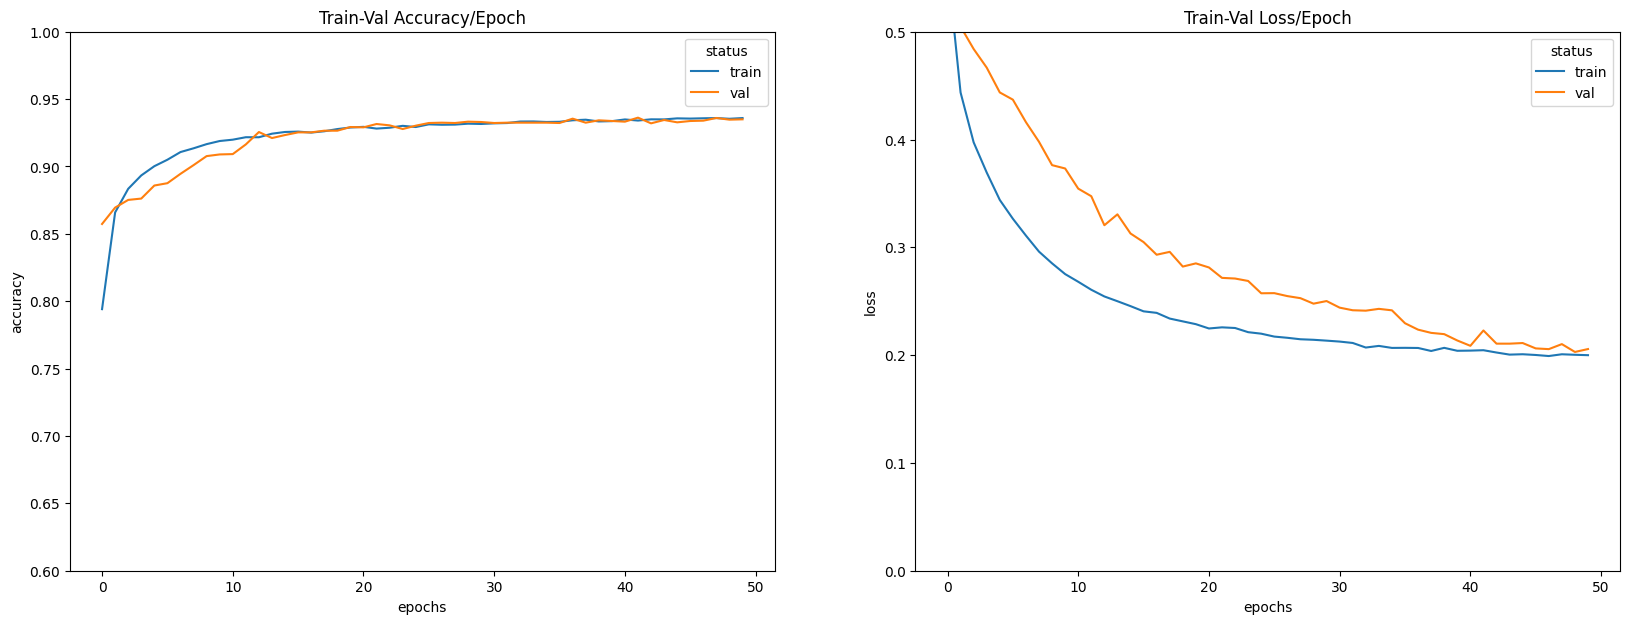

In [24]:
# Draw the plot
draw_plot(accuracy_stats, loss_stats)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Test the model
y_pred_list = test_model(test_loader, model)

# test accuracy
print("accuracy of test data: ", accuracy_score(y_test_xgb_predicted, y_pred_list))
print(classification_report(y_test_xgb_predicted, y_pred_list, target_names=['Benign', 'Malicious'], digits=4))

accuracy of test data:  0.9286706808707735
              precision    recall  f1-score   support

      Benign     0.9218    0.9856    0.9526     12571
   Malicious     0.9528    0.7764    0.8556      4701

    accuracy                         0.9287     17272
   macro avg     0.9373    0.8810    0.9041     17272
weighted avg     0.9302    0.9287    0.9262     17272



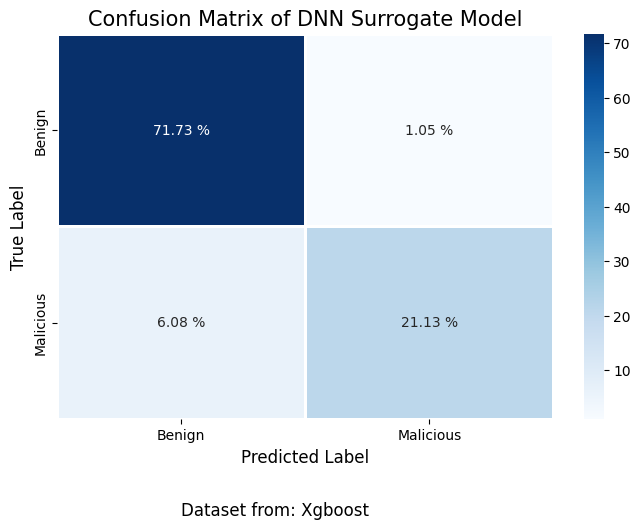

In [26]:
# draw confusion matrix
draw_confusion_matrix(y_test_xgb_predicted, y_pred_list, model, 'DNN', 'Xgboost')

### Train for DNN Predicted Data

In [27]:
train_dataset = ClassifierDataset(torch.tensor(np.array(X_train_dnn_predicted)).float(), torch.tensor(np.array(y_train_dnn_predicted)).long())
val_dataset = ClassifierDataset(torch.tensor(np.array(X_val_dnn_predicted)).float(), torch.tensor(np.array(y_val_dnn_predicted)).long())
test_dataset = ClassifierDataset(torch.tensor(np.array(X_test_dnn_predicted)).float(), torch.tensor(np.array(y_test_dnn_predicted)).long())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1,drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1,drop_last=True)

In [28]:
# Imports
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
from datetime import datetime


# Initialize network
model = DNN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# accuracy, loss status for each epoch
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

print("Begin training.")
best_vloss = 1000000
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# Train Network
for epoch in range(num_epochs):
    # train model
    train_epoch_loss, train_epoch_acc = train_for_one_epoch(model, train_loader, val_loader, criterion, optimizer, num_epochs)

    # validate model
    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc = 0
        model.eval()
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            val_loss = criterion(voutputs, vlabels)
            val_acc = (voutputs.argmax(1) == vlabels).float().sum() / len(vlabels)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    avg_vloss = val_epoch_loss/len(val_loader)


    # save the accuracy and loss for each epoch   
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
    
    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = '../surrogate_model/surrogate_DNN_model/surrogateDNN_model_fromDNN_{}_{}'.format(timestamp, epoch) # target_model\target_DNN_model\binaryclass
        torch.save(model.state_dict(), model_path)                           
        torch.save(model, model_path + '.pth')    
        
    print(f'Epoch {epoch + 1}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.4f}| Val Acc: {val_epoch_acc/len(val_loader):.4f}')


# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

Begin training.


  0%|          | 0/566 [00:00<?, ?it/s]

100%|██████████| 566/566 [00:01<00:00, 528.85it/s]


Epoch 1: | Train Loss: 0.58396 | Val Loss: 0.53264 | Train Acc: 0.7612| Val Acc: 0.8514


100%|██████████| 566/566 [00:01<00:00, 496.38it/s]


Epoch 2: | Train Loss: 0.48091 | Val Loss: 0.50451 | Train Acc: 0.8295| Val Acc: 0.8526


100%|██████████| 566/566 [00:01<00:00, 529.34it/s]


Epoch 3: | Train Loss: 0.44052 | Val Loss: 0.49363 | Train Acc: 0.8481| Val Acc: 0.8531


100%|██████████| 566/566 [00:01<00:00, 562.61it/s]


Epoch 4: | Train Loss: 0.41620 | Val Loss: 0.47774 | Train Acc: 0.8569| Val Acc: 0.8655


100%|██████████| 566/566 [00:01<00:00, 545.09it/s]


Epoch 5: | Train Loss: 0.39713 | Val Loss: 0.47846 | Train Acc: 0.8624| Val Acc: 0.8581


100%|██████████| 566/566 [00:01<00:00, 546.86it/s]


Epoch 6: | Train Loss: 0.38465 | Val Loss: 0.45844 | Train Acc: 0.8672| Val Acc: 0.8675


100%|██████████| 566/566 [00:01<00:00, 559.11it/s]


Epoch 7: | Train Loss: 0.37248 | Val Loss: 0.44701 | Train Acc: 0.8695| Val Acc: 0.8658


100%|██████████| 566/566 [00:00<00:00, 568.30it/s]


Epoch 8: | Train Loss: 0.36127 | Val Loss: 0.44259 | Train Acc: 0.8730| Val Acc: 0.8762


100%|██████████| 566/566 [00:00<00:00, 567.50it/s]


Epoch 9: | Train Loss: 0.35042 | Val Loss: 0.43457 | Train Acc: 0.8769| Val Acc: 0.8727


100%|██████████| 566/566 [00:01<00:00, 535.83it/s]


Epoch 10: | Train Loss: 0.34315 | Val Loss: 0.42756 | Train Acc: 0.8775| Val Acc: 0.8792


100%|██████████| 566/566 [00:01<00:00, 529.86it/s]


Epoch 11: | Train Loss: 0.33576 | Val Loss: 0.41934 | Train Acc: 0.8796| Val Acc: 0.8811


100%|██████████| 566/566 [00:01<00:00, 564.16it/s]


Epoch 12: | Train Loss: 0.32740 | Val Loss: 0.40989 | Train Acc: 0.8825| Val Acc: 0.8844


100%|██████████| 566/566 [00:01<00:00, 451.85it/s]


Epoch 13: | Train Loss: 0.32625 | Val Loss: 0.41167 | Train Acc: 0.8831| Val Acc: 0.8844


100%|██████████| 566/566 [00:01<00:00, 540.50it/s]


Epoch 14: | Train Loss: 0.31764 | Val Loss: 0.40822 | Train Acc: 0.8857| Val Acc: 0.8854


100%|██████████| 566/566 [00:01<00:00, 561.93it/s]


Epoch 15: | Train Loss: 0.31160 | Val Loss: 0.39010 | Train Acc: 0.8861| Val Acc: 0.8861


100%|██████████| 566/566 [00:01<00:00, 547.27it/s]


Epoch 16: | Train Loss: 0.30833 | Val Loss: 0.39437 | Train Acc: 0.8884| Val Acc: 0.8864


100%|██████████| 566/566 [00:01<00:00, 559.72it/s]


Epoch 17: | Train Loss: 0.30354 | Val Loss: 0.39021 | Train Acc: 0.8892| Val Acc: 0.8876


100%|██████████| 566/566 [00:01<00:00, 548.83it/s]


Epoch 18: | Train Loss: 0.29753 | Val Loss: 0.38293 | Train Acc: 0.8913| Val Acc: 0.8906


100%|██████████| 566/566 [00:01<00:00, 553.15it/s]


Epoch 19: | Train Loss: 0.29227 | Val Loss: 0.36779 | Train Acc: 0.8923| Val Acc: 0.8901


100%|██████████| 566/566 [00:00<00:00, 567.01it/s]


Epoch 20: | Train Loss: 0.29104 | Val Loss: 0.35275 | Train Acc: 0.8923| Val Acc: 0.8901


100%|██████████| 566/566 [00:01<00:00, 556.88it/s]


Epoch 21: | Train Loss: 0.28606 | Val Loss: 0.36750 | Train Acc: 0.8938| Val Acc: 0.8901


100%|██████████| 566/566 [00:01<00:00, 559.16it/s]


Epoch 22: | Train Loss: 0.27984 | Val Loss: 0.36092 | Train Acc: 0.8956| Val Acc: 0.8918


100%|██████████| 566/566 [00:01<00:00, 525.33it/s]


Epoch 23: | Train Loss: 0.27968 | Val Loss: 0.35065 | Train Acc: 0.8968| Val Acc: 0.9238


100%|██████████| 566/566 [00:01<00:00, 545.68it/s]


Epoch 24: | Train Loss: 0.27393 | Val Loss: 0.34349 | Train Acc: 0.8980| Val Acc: 0.9241


100%|██████████| 566/566 [00:01<00:00, 544.11it/s]


Epoch 25: | Train Loss: 0.26855 | Val Loss: 0.33636 | Train Acc: 0.8997| Val Acc: 0.8945


100%|██████████| 566/566 [00:01<00:00, 549.39it/s]


Epoch 26: | Train Loss: 0.26617 | Val Loss: 0.32341 | Train Acc: 0.9027| Val Acc: 0.8933


100%|██████████| 566/566 [00:01<00:00, 481.41it/s]


Epoch 27: | Train Loss: 0.26237 | Val Loss: 0.31492 | Train Acc: 0.9022| Val Acc: 0.8945


100%|██████████| 566/566 [00:01<00:00, 541.98it/s]


Epoch 28: | Train Loss: 0.25699 | Val Loss: 0.31571 | Train Acc: 0.9044| Val Acc: 0.8958


100%|██████████| 566/566 [00:01<00:00, 551.53it/s]


Epoch 29: | Train Loss: 0.25445 | Val Loss: 0.29623 | Train Acc: 0.9066| Val Acc: 0.8955


100%|██████████| 566/566 [00:01<00:00, 563.62it/s]


Epoch 30: | Train Loss: 0.25125 | Val Loss: 0.30223 | Train Acc: 0.9048| Val Acc: 0.8965


100%|██████████| 566/566 [00:01<00:00, 547.27it/s]


Epoch 31: | Train Loss: 0.24902 | Val Loss: 0.29398 | Train Acc: 0.9076| Val Acc: 0.8988


100%|██████████| 566/566 [00:01<00:00, 438.13it/s]


Epoch 32: | Train Loss: 0.24241 | Val Loss: 0.27299 | Train Acc: 0.9095| Val Acc: 0.9268


100%|██████████| 566/566 [00:01<00:00, 559.42it/s]


Epoch 33: | Train Loss: 0.24155 | Val Loss: 0.31976 | Train Acc: 0.9097| Val Acc: 0.8928


100%|██████████| 566/566 [00:01<00:00, 548.85it/s]


Epoch 34: | Train Loss: 0.24105 | Val Loss: 0.28756 | Train Acc: 0.9099| Val Acc: 0.9273


100%|██████████| 566/566 [00:01<00:00, 560.26it/s]


Epoch 35: | Train Loss: 0.23740 | Val Loss: 0.27562 | Train Acc: 0.9122| Val Acc: 0.9266


100%|██████████| 566/566 [00:01<00:00, 547.26it/s]


Epoch 36: | Train Loss: 0.23592 | Val Loss: 0.31743 | Train Acc: 0.9134| Val Acc: 0.8916


100%|██████████| 566/566 [00:01<00:00, 549.59it/s]


Epoch 37: | Train Loss: 0.23097 | Val Loss: 0.26529 | Train Acc: 0.9143| Val Acc: 0.9298


100%|██████████| 566/566 [00:01<00:00, 498.57it/s]


Epoch 38: | Train Loss: 0.22789 | Val Loss: 0.28214 | Train Acc: 0.9165| Val Acc: 0.9328


100%|██████████| 566/566 [00:01<00:00, 544.39it/s]


Epoch 39: | Train Loss: 0.22722 | Val Loss: 0.27766 | Train Acc: 0.9157| Val Acc: 0.9285


100%|██████████| 566/566 [00:01<00:00, 463.03it/s]


Epoch 40: | Train Loss: 0.22040 | Val Loss: 0.25532 | Train Acc: 0.9183| Val Acc: 0.9305


100%|██████████| 566/566 [00:01<00:00, 553.15it/s]


Epoch 41: | Train Loss: 0.22093 | Val Loss: 0.26996 | Train Acc: 0.9191| Val Acc: 0.9273


100%|██████████| 566/566 [00:01<00:00, 537.39it/s]


Epoch 42: | Train Loss: 0.21922 | Val Loss: 0.28480 | Train Acc: 0.9188| Val Acc: 0.9261


100%|██████████| 566/566 [00:01<00:00, 552.07it/s]


Epoch 43: | Train Loss: 0.21746 | Val Loss: 0.30035 | Train Acc: 0.9196| Val Acc: 0.8968


100%|██████████| 566/566 [00:01<00:00, 563.14it/s]


Epoch 44: | Train Loss: 0.21364 | Val Loss: 0.25359 | Train Acc: 0.9205| Val Acc: 0.9318


100%|██████████| 566/566 [00:01<00:00, 558.55it/s]


Epoch 45: | Train Loss: 0.21155 | Val Loss: 0.25530 | Train Acc: 0.9204| Val Acc: 0.9340


100%|██████████| 566/566 [00:01<00:00, 512.50it/s]


Epoch 46: | Train Loss: 0.20991 | Val Loss: 0.25726 | Train Acc: 0.9225| Val Acc: 0.9303


100%|██████████| 566/566 [00:01<00:00, 555.69it/s]


Epoch 47: | Train Loss: 0.20965 | Val Loss: 0.23696 | Train Acc: 0.9232| Val Acc: 0.9337


100%|██████████| 566/566 [00:01<00:00, 559.07it/s]


Epoch 48: | Train Loss: 0.20655 | Val Loss: 0.24502 | Train Acc: 0.9248| Val Acc: 0.9360


100%|██████████| 566/566 [00:01<00:00, 553.11it/s]


Epoch 49: | Train Loss: 0.20870 | Val Loss: 0.30566 | Train Acc: 0.9215| Val Acc: 0.8906


100%|██████████| 566/566 [00:01<00:00, 492.03it/s]


Epoch 50: | Train Loss: 0.20647 | Val Loss: 0.23191 | Train Acc: 0.9233| Val Acc: 0.9360
Accuracy on training set: 94.71
Accuracy on test set: 91.70


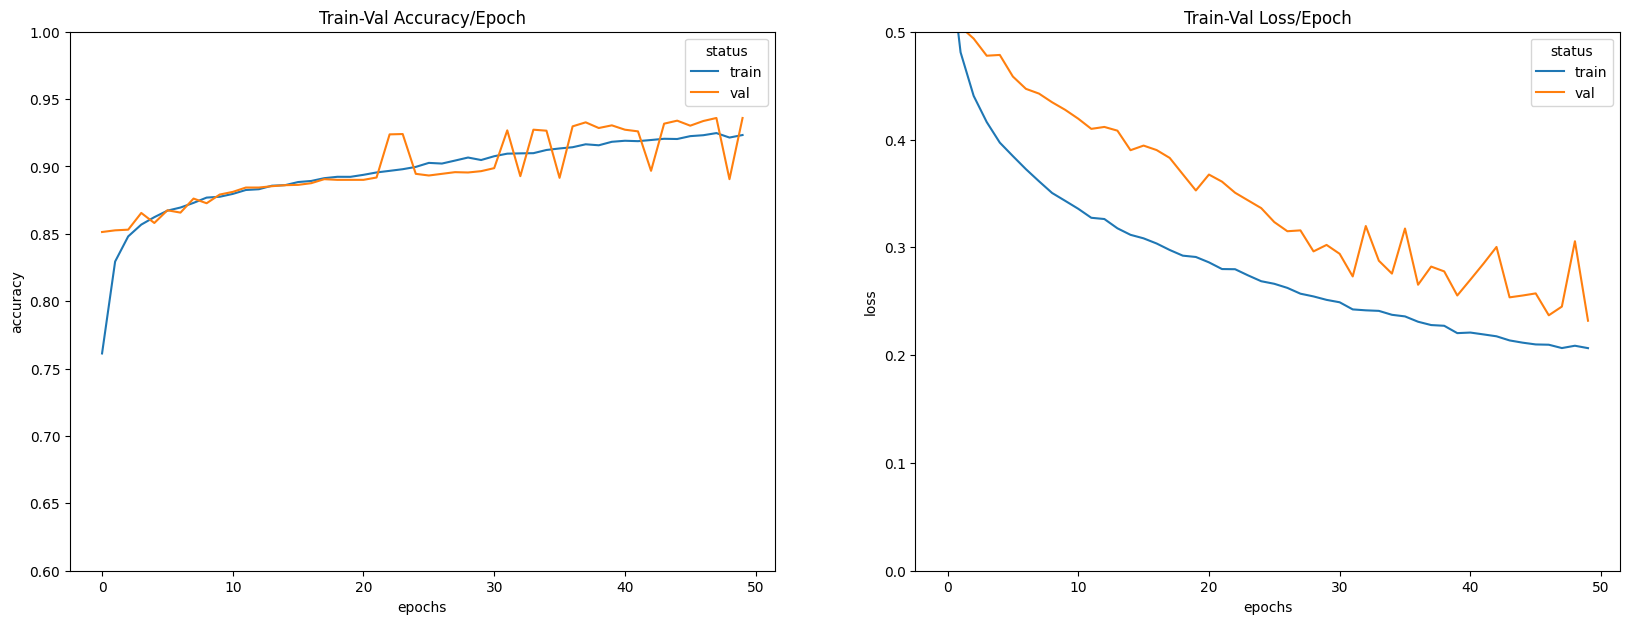

In [29]:
# Draw the plot
draw_plot(accuracy_stats, loss_stats)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Test the model
y_pred_list = test_model(test_loader, model)

# test accuracy
print("accuracy of test data: ", accuracy_score(y_test_dnn_predicted, y_pred_list))
print(classification_report(y_test_dnn_predicted, y_pred_list, target_names=['Benign', 'Malicious'], digits=4))

accuracy of test data:  0.916975451597962
              precision    recall  f1-score   support

      Benign     0.9609    0.9235    0.9418     12571
   Malicious     0.8147    0.8996    0.8550      4701

    accuracy                         0.9170     17272
   macro avg     0.8878    0.9115    0.8984     17272
weighted avg     0.9211    0.9170    0.9182     17272



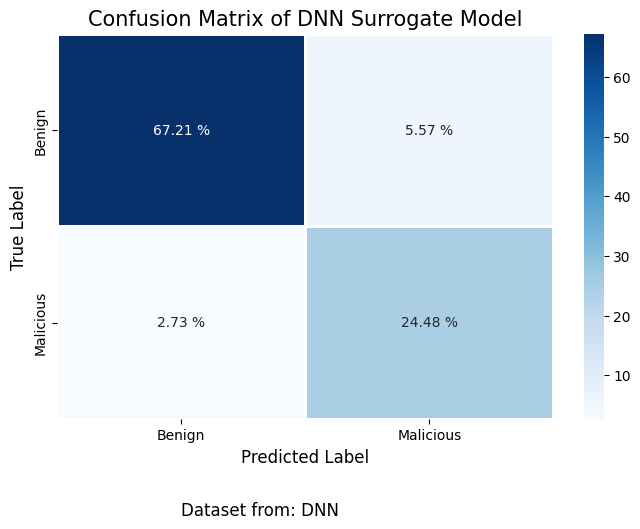

In [31]:
# draw confusion matrix
draw_confusion_matrix(y_test_dnn_predicted, y_pred_list, model, 'DNN', 'DNN')